In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.stats import skew
import Scope_funcs as sf


imports work
imports work


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

In [2]:
run_number = 1080

hit_data = rf.get_ROOT_data_zip_RECO(run_number)

# print(len(hit_data))
# plane_7 = hit_data[hit_data.plane == 7]
# mask = ak.num(plane_7) == 1
# first_plane_starting_events = hit_data[mask]
# print(len(first_plane_starting_events))

1080 RECONSTRUCTED finished


<span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes

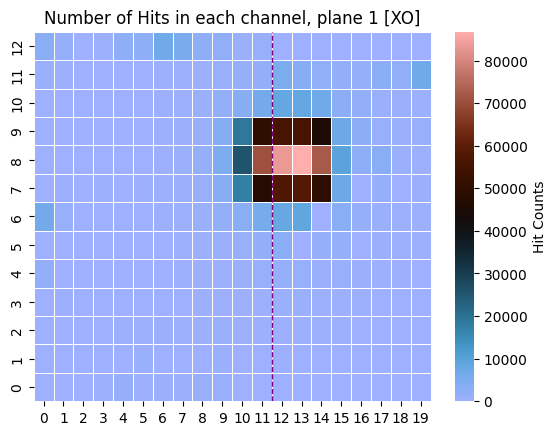

In [3]:
rf.hits_amount_colormap_single_plane(hit_data, 1, inverse_plane_order=True)

<span style="font-family: arial; font-size:25px; color:pink">

Shower Evolution Throughout the Sensor

In [4]:
# rf.single_event_evolution_amp(hit_data, 441166, cmap="managua")

In [5]:
# plt.clf()   # Clear the current figure
# plt.close() # Close any open figures
# %matplotlib widget
# rf.amp_histo_single_plane(hit_data_1101,1)

In [2]:
# rf.amp_histo_single_plane_total_event(hit_data,1)

In [1]:
# rf.average_amp_vs_plane(hit_data)

In [8]:
# rf.plot_empty_first_planes(hit_data)

In [4]:
# rf.event_shower_energy_vs_X_position(hit_data)

In [5]:
# rf.event_shower_energy_vs_X_position(hit_data, specific_Y=8)

In [3]:
# rf.Histo_shower_energy_for_X_position(hit_data, 5, single_pad_only = "true")

In [4]:
# hit_data_with_distances = rf.Radii_from_Initial_position(hit_data)
# rf.frac_energy_radii_histo(hit_data_with_distances, 0.95)

In [5]:
# hit_data_with_distances = rf.Radii_from_Initial_position(hit_data)
# rf.frac_energy_radii_histo(hit_data_with_distances, 0.9)

In [4]:
data_scope = sf.DUT_TELE_merge(1080)

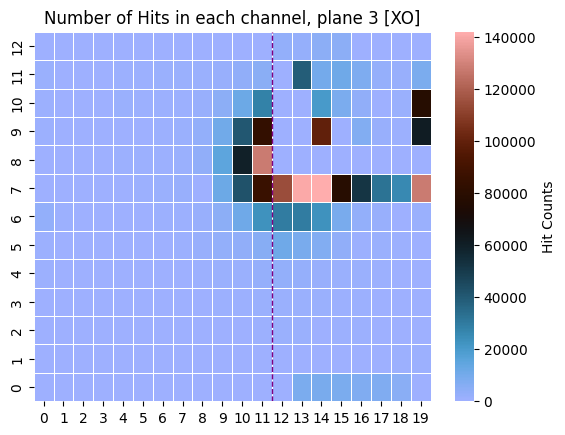

In [6]:
rf.hits_amount_colormap_single_plane(data_scope.hits, 3)

In [5]:
path = "TB_FIRE\TB_reco\TB_FIRE_1080_raw_reco_diagnostics.root"
data_scope_corrected = rf.reconstruct_data_all_dead_pads(data_scope,2,path)

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\bents\AppData\Local\Temp\ipykernel_30104\1787111425.py:1: SyntaxWarning: invalid escape sequence '\T'
  path = "TB_FIRE\TB_reco\TB_FIRE_1080_raw_reco_diagnostics.root"


shower center: 171
we got the data
amount of dead channels: 139
{plane_ID: 1, channel_ID: 133}
7 channels left
{plane_ID: 2, channel_ID: 172}
6 channels left
{plane_ID: 2, channel_ID: 173}
5 channels left
{plane_ID: 2, channel_ID: 192}
4 channels left
{plane_ID: 2, channel_ID: 193}
3 channels left
{plane_ID: 2, channel_ID: 212}
2 channels left
{plane_ID: 2, channel_ID: 213}
1 channels left
{plane_ID: 4, channel_ID: 210}
0 channels left


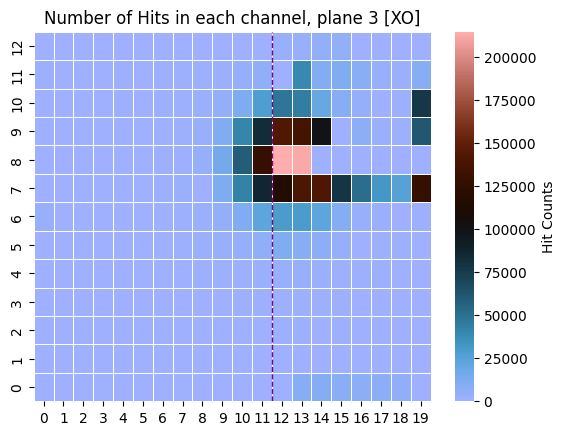

In [7]:
rf.hits_amount_colormap_single_plane(data_scope_corrected.hits, 3)

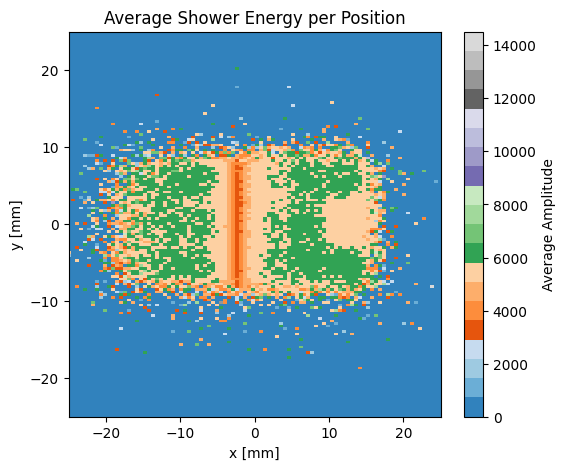

In [9]:
sf.avg_energy_scope_colormap(data_scope_corrected, x_borders=25, y_borders=25)

Gaussian fit parameters:
c     = 5839.162
m     = -5.865
theta     = -1.402 Radians
A     = 2425.935
mu    = -2.272
sigma = 1.005


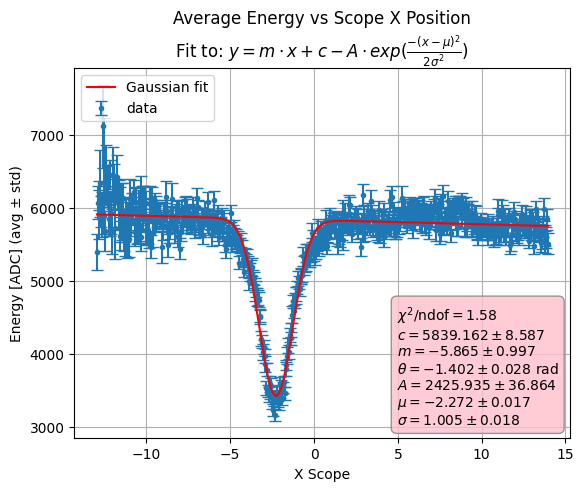

In [14]:
sf.E_vs_X_scope_gaussian_fit(data_scope_corrected, 0.5, -10, 10, -13, 14, 0.05)

C:\Users\bents\AppData\Local\Programs\Python\Python313\Lib\site-packages\awkward\_nplikes\array_module.py:292: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


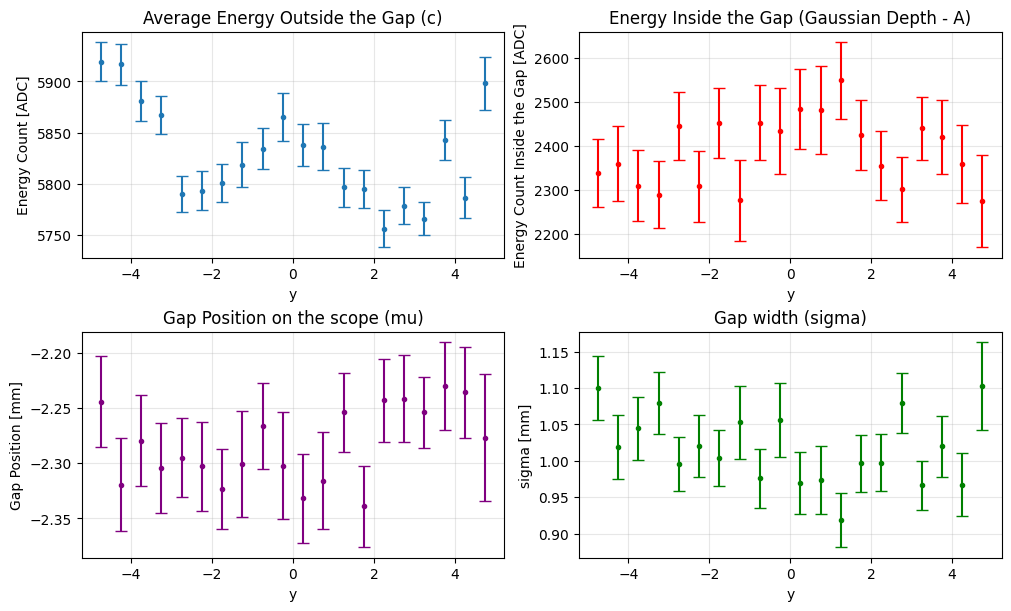

In [17]:
sf.plot_gap_vs_y(data_scope_corrected, y_range=5, y_bins=0.5)